In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sapslab/Training_datad9b6ebc.csv


In [2]:
data = pd.read_csv("/kaggle/input/sapslab/Training_datad9b6ebc.csv")
data.head(4)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score
0,23756,B0013NUGDE,A2OH0EA9PEW4FN,bookgoddess88,2,3,1279411200,Only 2 points for Weight Watchers,I order these chips on a regular basis. I lik...,3
1,528127,B000JMDH40,A8GHHQVULZ9NF,Alessandra,1,1,1240012800,Delicious!!!,Baby love it!Taste sweet but there is no sugar...,5
2,491505,B0026LJRW8,A2S40W6PSX0CQI,Benjamin,1,1,1336348800,Baconlicious!,it's difficult to come up with 20 words for su...,5
3,98982,B001ED0H3C,A1XM4P40K1OPOM,"James M. Martin ""Mike""",0,0,1336694400,Will this probe work for the Oregon Scientific?,I beleive the probe I have for my Oregon Scien...,5


In [3]:
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               13
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Time                       0
Summary                   22
Text                       0
Score                      0
dtype: int64

In [4]:
data.shape

(397917, 10)

In [5]:
data.dropna(inplace=True)
data.shape

(397882, 10)

In [6]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Time', 'Summary', 'Text', 'Score'],
      dtype='object')

In [7]:
data.drop(['Id', 'ProductId', 'UserId', 'ProfileName','Time'], axis=1, inplace=True)
data.head(2)

,HelpfulnessNumerator,HelpfulnessDenominator,Summary,Text,Score
0,2,3,Only 2 points for Weight Watchers,I order these chips on a regular basis. I lik...,3
1,1,1,Delicious!!!,Baby love it!Taste sweet but there is no sugar...,5


<AxesSubplot:title={'center':'Distribution of Score in Dataset'}>

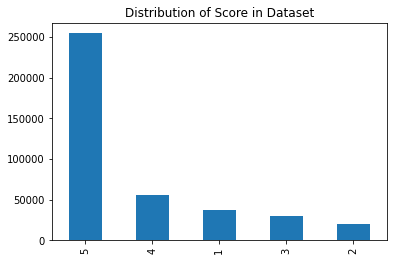

In [8]:
import matplotlib.pyplot as plt
pd.value_counts(data['Score']).plot.bar(title="Distribution of Score in Dataset")

In [9]:
import imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [10]:
from gensim.parsing.preprocessing import remove_stopwords
from gensim.utils import simple_preprocess

In [11]:
data['Summary_'] = [remove_stopwords(line) for line in data['Summary']] 
data['Text_'] = [remove_stopwords(line) for line in data['Text']] 
data['Summary_'] = [simple_preprocess(line, deacc=True) for line in data['Summary_']] 
data['Text_'] = [simple_preprocess(line, deacc=True) for line in data['Text_']] 
print(data.head(4))

   HelpfulnessNumerator  HelpfulnessDenominator  \
0                     2                       3   
1                     1                       1   
2                     1                       1   
3                     0                       0   

                                           Summary  \
0                Only 2 points for Weight Watchers   
1                                     Delicious!!!   
2                                    Baconlicious!   
3  Will this probe work for the Oregon Scientific?   

                                                Text  Score  \
0  I order these chips on a regular basis.  I lik...      3   
1  Baby love it!Taste sweet but there is no sugar...      5   
2  it's difficult to come up with 20 words for su...      5   
3  I beleive the probe I have for my Oregon Scien...      5   

                                  Summary_  \
0         [only, points, weight, watchers]   
1                              [delicious]   
2                  

In [12]:
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()

In [13]:
data['Summary_'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in data['Summary_'] ]
data['Text_'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in data['Text_'] ]
data.head(4)

,HelpfulnessNumerator,HelpfulnessDenominator,Summary,Text,Score,Summary_,Text_
0,2,3,Only 2 points for Weight Watchers,I order these chips on a regular basis. I lik...,3,"[onli, point, weight, watcher]","[order, chip, regular, basi, like, portion, ba..."
1,1,1,Delicious!!!,Baby love it!Taste sweet but there is no sugar...,5,[delici],"[babi, love, it, tast, sweet, sugar, babi, lov..."
2,1,1,Baconlicious!,it's difficult to come up with 20 words for su...,5,[baconlici],"[it, difficult, come, word, sunflow, seed, awe..."
3,0,0,Will this probe work for the Oregon Scientific?,I beleive the probe I have for my Oregon Scien...,5,"[will, probe, work, oregon, scientif]","[beleiv, probe, oregon, scientif, burn, out, d..."


In [14]:
from gensim import corpora

In [15]:
mydict_summary = corpora.Dictionary(data['Summary_'])
mydict_text = corpora.Dictionary(data['Text_'])
print(len(mydict_text.token2id))
print(len(mydict_summary.token2id))

68250
21359


In [16]:
data['summary_'] = [mydict_summary.doc2bow(x) for x in data['Summary_']]
data['text_'] = [mydict_text.doc2bow(x) for x in data['Text_']]

In [17]:
data.head(4)

,HelpfulnessNumerator,HelpfulnessDenominator,Summary,Text,Score,Summary_,Text_,summary_,text_
0,2,3,Only 2 points for Weight Watchers,I order these chips on a regular basis. I lik...,3,"[onli, point, weight, watcher]","[order, chip, regular, basi, like, portion, ba...","[(0, 1), (1, 1), (2, 1), (3, 1)]","[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2..."
1,1,1,Delicious!!!,Baby love it!Taste sweet but there is no sugar...,5,[delici],"[babi, love, it, tast, sweet, sugar, babi, lov...","[(4, 1)]","[(17, 1), (33, 4), (34, 1), (35, 1), (36, 1), ..."
2,1,1,Baconlicious!,it's difficult to come up with 20 words for su...,5,[baconlici],"[it, difficult, come, word, sunflow, seed, awe...","[(5, 1)]","[(6, 1), (21, 1), (42, 1), (55, 1), (56, 1), (..."
3,0,0,Will this probe work for the Oregon Scientific?,I beleive the probe I have for my Oregon Scien...,5,"[will, probe, work, oregon, scientif]","[beleiv, probe, oregon, scientif, burn, out, d...","[(6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]","[(42, 1), (66, 1), (67, 1), (68, 1), (69, 1), ..."


In [18]:
X = data[["summary_","text_"]]
yscore = data["Score"]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,yscore,test_size=0.15)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(338199, 2)
(59683, 2)
(338199,)
(59683,)
